In [91]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 
# shows plots in jupyter window, doesn't open a new one

In [92]:
data = pd.read_csv('ex1data2.txt', header = None, names = ["Size", "Bedrooms", "Price"])
m=len(data)

x0 = np.ones(m)
size = np.array((data["Size"]))
bedrooms = np.array((data["Bedrooms"]))
X=np.array([x0,size,bedrooms]).T
y=np.array(data["Price"]).reshape(m, 1)
theta_init = np.zeros((3,1))


In [93]:
def normalize(X):
    X = X[:, 1:] #delete first column of ones
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma


X_norm, mu, sigma = normalize(X)

# Add intercept column of ones
X_final = np.hstack([np.ones((m, 1)), X_norm])

In [94]:
def gradient_descent_multi(X,y,theta,alpha,iterations):
    m=len(y)
    J_history = []
    for i in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        gradient = (1 / m) * (X.T @ errors)
        theta = theta - alpha * gradient
        cost = (1/(2*m))*(errors.T @ errors)
        J_history.append(cost.item())
    return theta, J_history

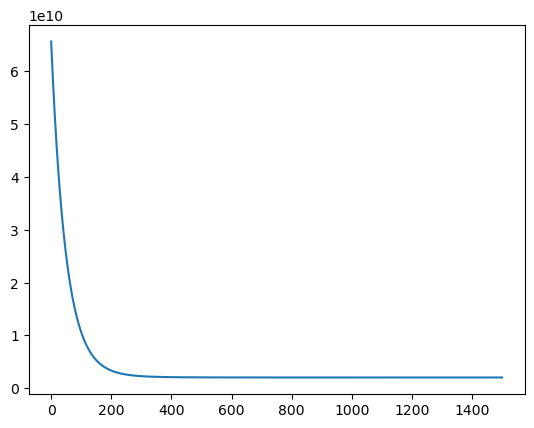

In [95]:
alpha = 0.01
iterations = 1500

theta, J_history = gradient_descent_multi(X_final,y,theta_init,alpha,iterations)

plt.plot(J_history)
plt.show()

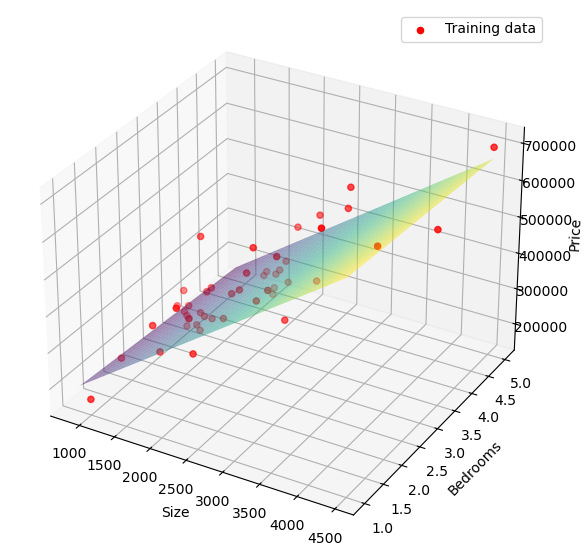

In [96]:
# Assuming these are your original arrays (not normalized)
size = np.array(data["Size"])
bedrooms = np.array(data["Bedrooms"])
y = np.array(data["Price"])

# Create figure and 3D axis
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual training data points
ax.scatter(size, bedrooms, y, color='red', label='Training data')

# Create a grid over feature space for surface plotting
size_vals = np.linspace(size.min(), size.max(), 30)
bedrooms_vals = np.linspace(bedrooms.min(), bedrooms.max(), 30)
size_grid, bedrooms_grid = np.meshgrid(size_vals, bedrooms_vals)

# Normalize features for prediction (using your saved mu and sigma)
size_norm = (size_grid - mu[0]) / sigma[0]
bedrooms_norm = (bedrooms_grid - mu[1]) / sigma[1]

# Prepare input for prediction (with intercept)
m_grid = size_grid.size
X_grid = np.column_stack((
    np.ones(m_grid),
    size_norm.ravel(),
    bedrooms_norm.ravel()
))

# Predict prices on the grid
price_preds = X_grid @ theta
price_preds = price_preds.reshape(size_grid.shape)

# Plot predicted surface
ax.plot_surface(size_grid, bedrooms_grid, price_preds, alpha=0.5, cmap='viridis')

ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.legend()
plt.show()

In [97]:
theta2 = np.linalg.inv(X.T @ X) @ X.T @ y
print(theta2)

[89597.9095428    139.21067402 -8738.01911233]


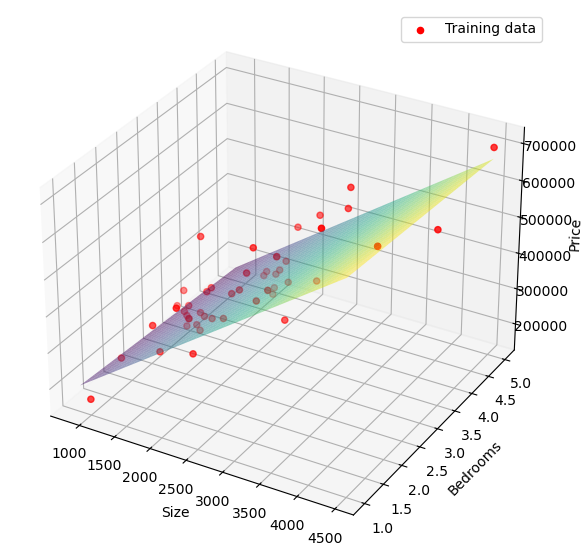

In [98]:
# Assuming these are your original arrays (not normalized)
size = np.array(data["Size"])
bedrooms = np.array(data["Bedrooms"])
y = np.array(data["Price"])

# Create figure and 3D axis
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual training data points
ax.scatter(size, bedrooms, y, color='red', label='Training data')

# Create a grid over feature space for surface plotting
size_vals = np.linspace(size.min(), size.max(), 30)
bedrooms_vals = np.linspace(bedrooms.min(), bedrooms.max(), 30)
size_grid, bedrooms_grid = np.meshgrid(size_vals, bedrooms_vals)

# Prepare input for prediction (with intercept)
m_grid = size_grid.size
X_grid = np.column_stack((
    np.ones(m_grid),
    size_grid.ravel(),
    bedrooms_grid.ravel()
))

# Predict prices on the grid
price_preds = X_grid @ theta2
price_preds = price_preds.reshape(size_grid.shape)

# Plot predicted surface
ax.plot_surface(size_grid, bedrooms_grid, price_preds, alpha=0.5, cmap='viridis')

ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.legend()
plt.show()